In [1]:
import psycopg2
from pprint import pprint
import pandas as pd

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# set the default plot size
pylab.rcParams['figure.figsize'] = (20, 10)

# set max number of rows
pd.set_option('display.max_rows', 500)

In [4]:
# connect to the database
conn = psycopg2.connect(database="postgres",
                        user="postgres",
                        password="apassword",
                        host="localhost")

conn.autocommit = True
cur = conn.cursor()

In [5]:
# pull down all weather condition data
cur.execute("""SELECT condition
               FROM arlington_weather_condition""")

items = [line[0] for line in cur]

In [6]:
# how many records were returned?
len(items)

24056

In [7]:
# inspect the last record
pprint(items[-1])

{'current_observation': {'UV': '2',
                         'dewpoint_c': -2,
                         'dewpoint_f': 29,
                         'dewpoint_string': '29 F (-2 C)',
                         'display_location': {'city': 'Arlington',
                                              'country': 'US',
                                              'country_iso3166': 'US',
                                              'elevation': '75.9',
                                              'full': 'Arlington, VA',
                                              'latitude': '38.88999939',
                                              'longitude': '-77.08999634',
                                              'magic': '1',
                                              'state': 'VA',
                                              'state_name': 'Virginia',
                                              'wmo': '99999',
                                              'zip': '22201'},
              

In [8]:
# flatten the nested dictionary
# https://stackoverflow.com/questions/6027558

import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [9]:
# grab just the current observation from the data and flatten it
data = []
for line in items:
    try:
        thing = line['current_observation']
        thing_flat = flatten(thing)
        data.append(thing_flat)
    except:
        pass

In [10]:
# how many records were retained?
len(data)

24014

In [11]:
# load the flattened data into a DataFrame
df = pd.DataFrame(data)

In [12]:
# set index as datetime
df.set_index(pd.to_datetime(df['observation_epoch'], unit='s'), inplace=True)

In [13]:
# subset the dataframe to most recent data
df = df.ix['2018-01-09':]

/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [14]:
# inspect the DataFrame
df.head()

,UV,dewpoint_c,dewpoint_f,dewpoint_string,display_location_city,display_location_country,display_location_country_iso3166,display_location_elevation,display_location_full,display_location_latitude,...,wind_degrees,wind_dir,wind_gust_kph,wind_gust_mph,wind_kph,wind_mph,wind_string,windchill_c,windchill_f,windchill_string
observation_epoch,,,,,,,,,,,,,,,,,,,,,
2018-01-12 05:14:51,0.0,15,58,58 F (15 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,330,NNW,0,0,0.0,0.0,Calm,NA,NA,NA
2018-01-12 06:45:02,0.0,15,59,59 F (15 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,174,South,0,0,0.0,0.0,Calm,NA,NA,NA
2018-01-20 23:34:51,0.0,3,38,38 F (3 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,38,NE,0,0,0.0,0.0,Calm,NA,NA,NA
2018-01-21 15:54:53,2.0,3,38,38 F (3 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,38,NE,4.0,2.5,0.0,0.2,Calm,NA,NA,NA
2018-01-21 16:20:00,1.0,4,39,39 F (4 C),Arlington,US,US,75.9,"Arlington, VA",38.88999939,...,96,East,0,0,0.0,0.0,Calm,NA,NA,NA


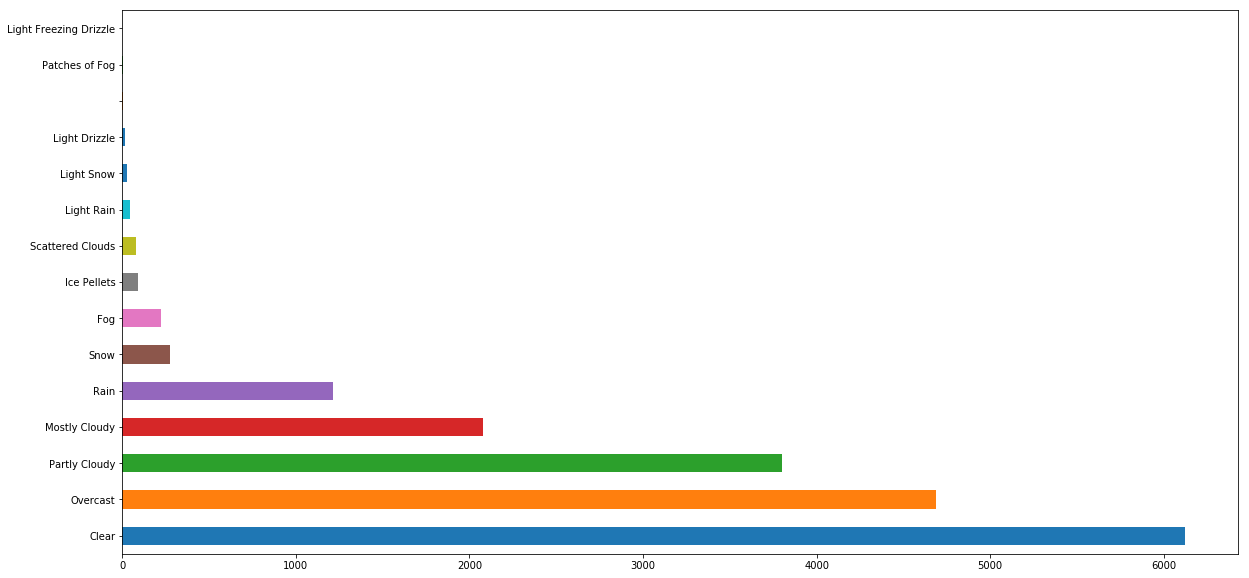

In [15]:
# plot number of records by weather
df.weather.value_counts().plot(kind='barh')

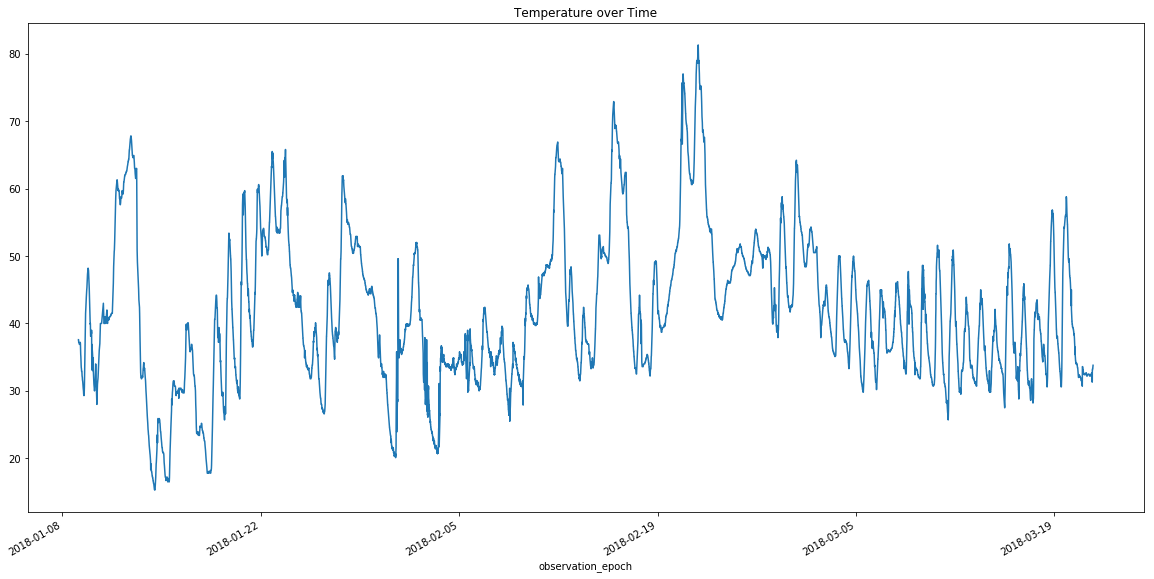

In [16]:
# plot temerature over time
df.temp_f.plot(title="Temperature over Time")

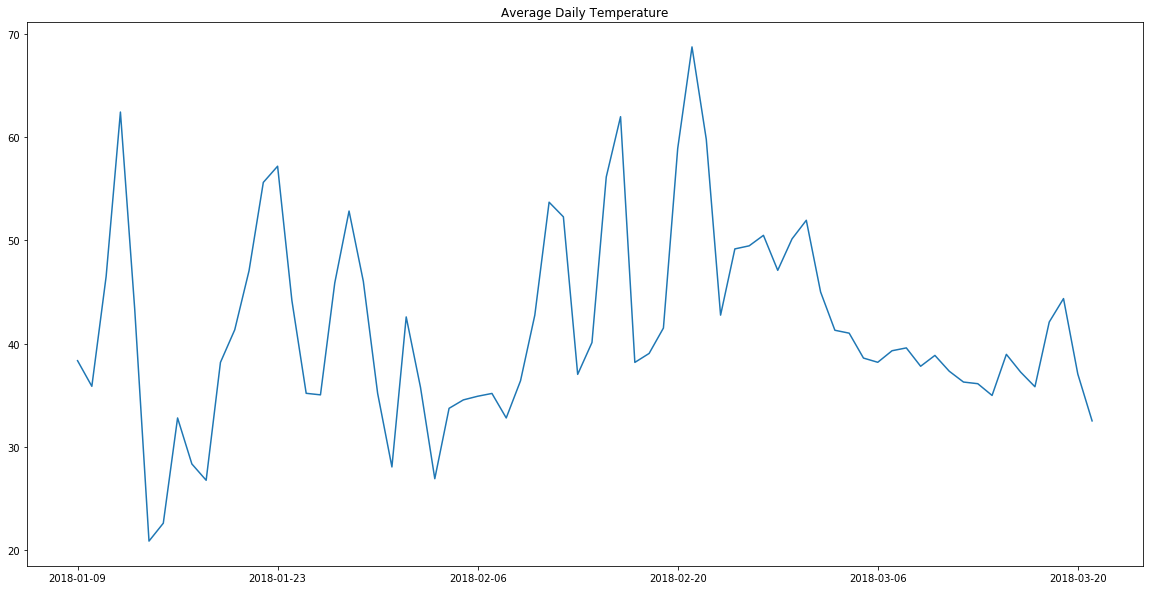

In [17]:
# plot the average daily temperature
df.groupby(df.index.date)['temp_f'].mean().plot(title="Average Daily Temperature")

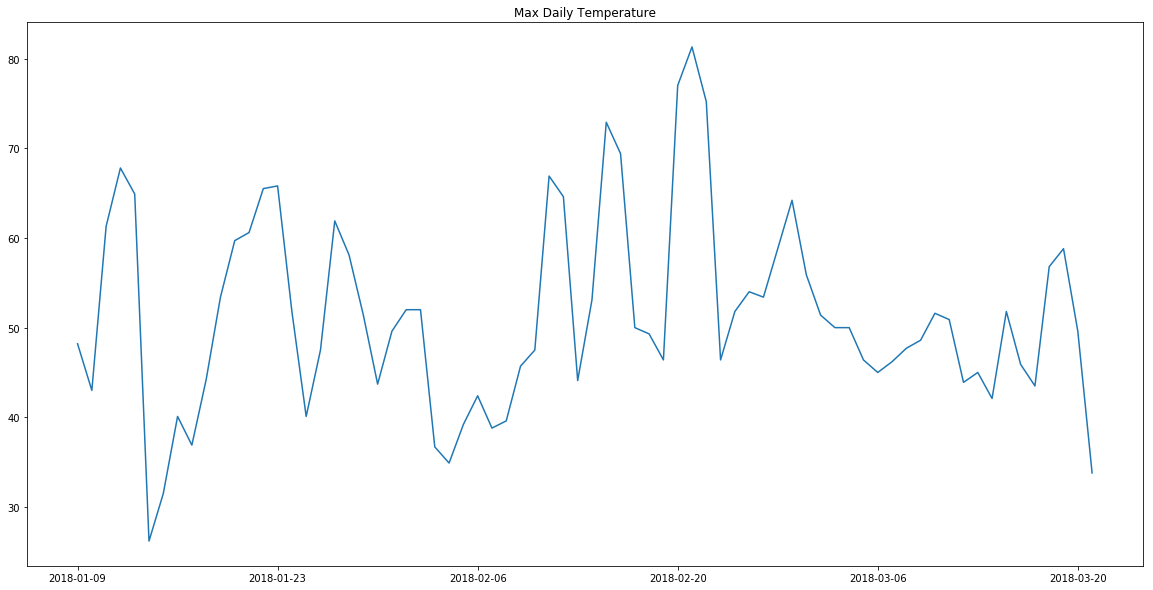

In [18]:
# plot the max daily temperature
df.groupby(df.index.date)['temp_f'].max().plot(title="Max Daily Temperature")

In [19]:
# subset to the weather for just the past week
df_week = df.ix['2018-03-14':]

/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


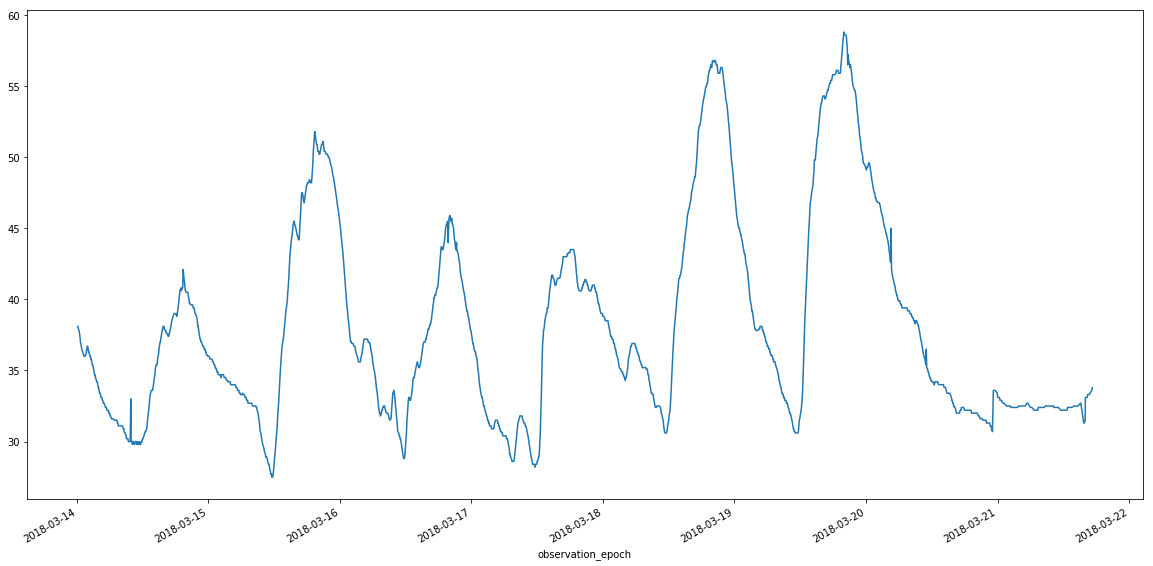

In [20]:
# plot temperatures over just the last week
df_week['temp_f'].plot()

/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


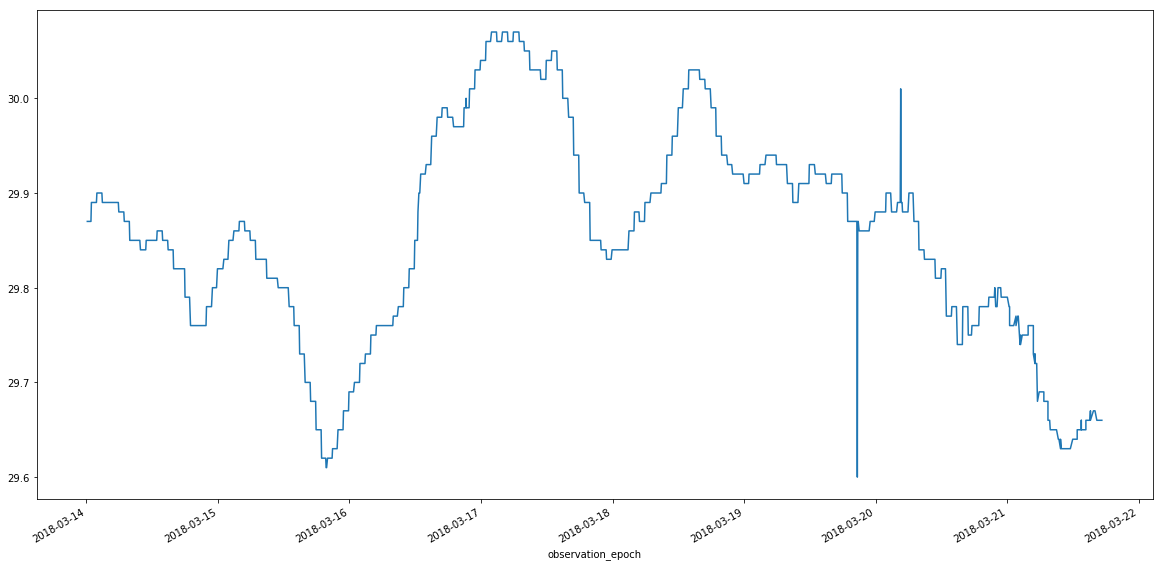

In [21]:
# convert pressure to numeric value
df_week.pressure_in = pd.to_numeric(df_week.pressure_in)

# plot the pressure over just the last week
df_week['pressure_in'].plot()

In [39]:
# subset to variables of interest
cols = ['dewpoint_f', 'feelslike_f', 'precip_1hr_in', 'pressure_in', 'relative_humidity', 'temp_f', 
        'visibility_mi', 'wind_mph', 'windchill_f']
all_cols = cols + ['weather']
new = df[all_cols]

# remove % from humidity
new.relative_humidity = new.relative_humidity.str.strip('%')

# convert all columns to numeric
for col in cols:
    new[col] = pd.to_numeric(new[col], errors='coerce')
    
# transform humidity into decimal
new.relative_humidity = new.relative_humidity / 100

/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/curtis/Program_Files/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


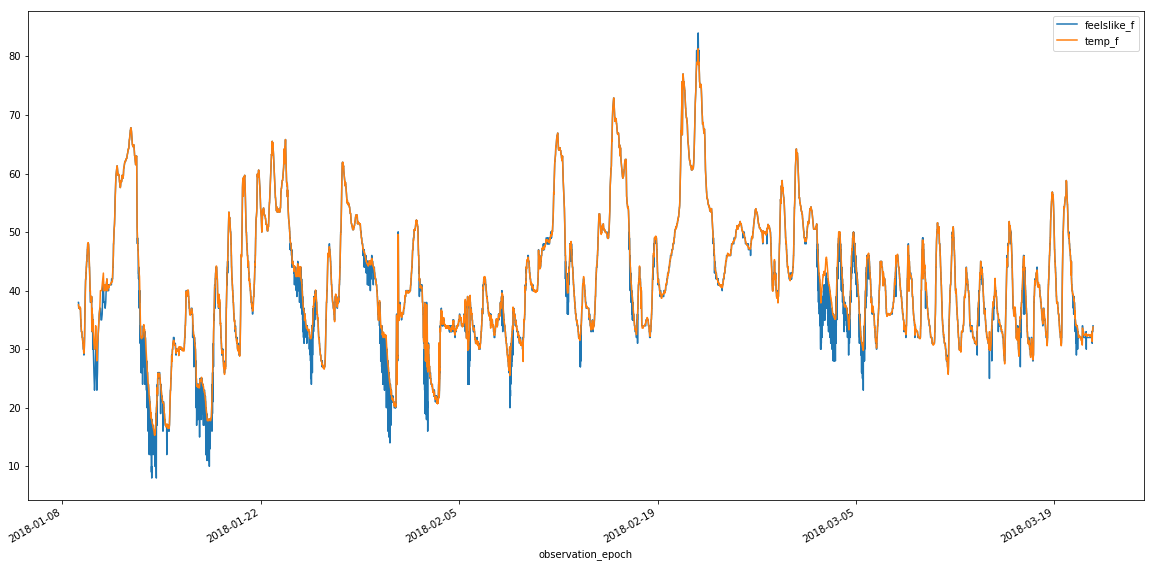

In [41]:
# plot feelslike vs actual temperature
new[['feelslike_f', 'temp_f']].plot()

In [42]:
# look at the correlations between variables
new.corr()

,dewpoint_f,feelslike_f,precip_1hr_in,pressure_in,relative_humidity,temp_f,visibility_mi,wind_mph,windchill_f
dewpoint_f,1.000000,0.838183,0.052540,-0.196533,0.714152,0.837683,-0.247696,-0.107692,0.705590
feelslike_f,0.838183,1.000000,0.084511,-0.179658,0.236712,0.993306,-0.043848,-0.128452,1.000000
precip_1hr_in,0.052540,0.084511,1.000000,0.000452,0.011848,0.071829,0.002356,-0.125241,0.050399
pressure_in,-0.196533,-0.179658,0.000452,1.000000,-0.113456,-0.189988,0.138902,-0.126870,-0.137451
relative_humidity,0.714152,0.236712,0.011848,-0.113456,1.000000,0.225811,-0.438953,-0.168506,0.170374
temp_f,0.837683,0.993306,0.071829,-0.189988,0.225811,1.000000,-0.037055,-0.032126,0.978856
visibility_mi,-0.247696,-0.043848,0.002356,0.138902,-0.438953,-0.037055,1.000000,0.076445,-0.138084
wind_mph,-0.107692,-0.128452,-0.125241,-0.126870,-0.168506,-0.032126,0.076445,1.000000,-0.130012
windchill_f,0.705590,1.000000,0.050399,-0.137451,0.170374,0.978856,-0.138084,-0.130012,1.000000


In [43]:
# write recent weather to CSV
new.to_csv("recent_weather.csv")